# Técnicas de aprendizaje de máquina - Árboles de decisión 

En este notebook trabajaremos con uno de los modelos fundamentales de Machine Learning, Árboles de Decisión. Para ello, utilizaremos el conjunto de datos titanic para nuestro problema de clasificación y auto-mpg para el problema de regresión. El notebook está dividido en tres partes: 

1. Árboles de Decisión para clasificación con Scikit-Learn.
2. Árboles de Decisión para regresión con Scikit-Learn.
3. Árboles de Decisión implementación manual. Cálculo de Impureza y Ganancia Gini.

**Antes de empezar**

Generalmente, en cualquier proyecto orientado a aprendizaje de máquina se efectuan las siguientes actividades:

1. Reconocimiento del contexto (Conocimiento de negocio)
2. Reconocimiento de los datos (Análisis exploratorio de los datos)
3. Limpieza y preparación de los datos (partición entrenamiento-pruebas, generación de características, tratamiento de outliers, entre otros)
4. Generación de modelo ingenuo y obtención de resultados
5. Ajuste de hiperparámetros (Manual o automatizado)
6. Evaluación de resultados y conclusiones
7. Siguientes pasos (En la industria generalmente sigue una etapa de despliegue del modelo)

Teniendo en cuenta estos pasos, vamos a empezar por reconocer algunos de ellos. Eventualmente, iremos explorando los demás pasos con mayor profundidad.

## Árboles de Decisión para clasificación con Scikit-Learn.

### Reconocimiento del contexto
En Abril de 1972 sarpó el Titanic con una cantidad de pasajeros considerable. Desafortunadamente, colisionó con un iceber produciendose uno de los mayores desastres de la industria marítima. Ahora, trataremos de establecer un modelo que nos permita establecer qué tipo de pasajeros son los que son más propensos a salvarse ante una situación similar.

### Reconocimiento de los datos
Para este ejercicio trabajaremos con el conjunto de datos de Titanic, que puedes extraer de en la competencia en Kaggle: [Machine Learning from Disaster](https://www.kaggle.com/c/titanic). Los exploraremos rápidamente, haciendo uso de la librería [Pandas profiling.](https://github.com/pandas-profiling/pandas-profiling) Para ello, instalaremos la libreria en nuestro entorno virtual.

In [1]:
#Descomenta esta línea si deseas instalar el paquete
#!conda install -c conda-forge pandas-profiling 

In [1]:
#Importemos los paquetes iniciales para la exploración de datos
import pandas as pd #Librería para importar y manejar los datos
import numpy as np #Librería para cálculo numérico
from pandas_profiling import ProfileReport #Librería para explorar los datos

In [2]:
df = pd.read_csv('train.csv')
profile = ProfileReport(df, title="Exploración datos titanic")

In [3]:
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

¿Qué conclusiones puedes hacer de las gráficas anteriores?

Ahora pasemos a la generación del modelo. Primero, importamos las librerías necesarias para ello:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [5]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [6]:
df_Sin_NA = df.dropna()

In [7]:
df_Sin_NA

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[183 rows x 12 columns]

Ahora vamos a establecer nuestras variables independientes y variables dependientes

In [8]:
X = df_Sin_NA[['Pclass','SibSp','Parch','Age','Sex']]

In [9]:
X

Pclass  SibSp  Parch   Age     Sex
1         1      1      0  38.0  female
3         1      1      0  35.0  female
6         1      0      0  54.0    male
10        3      1      1   4.0  female
11        1      0      0  58.0  female
..      ...    ...    ...   ...     ...
871       1      1      1  47.0  female
872       1      0      0  33.0    male
879       1      0      1  56.0  female
887       1      0      0  19.0  female
889       1      0      0  26.0    male

[183 rows x 5 columns]

Veamos que nuestra variable sex es categórica, debemos convertirla en numéroca para poder trabajar.

In [10]:
X.loc[X.Sex == 'male','Sex'] = 0
X.loc[X.Sex == 'female','Sex'] = 1

C:\Users\Guatavita\anaconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
X

Pclass  SibSp  Parch   Age Sex
1         1      1      0  38.0   1
3         1      1      0  35.0   1
6         1      0      0  54.0   0
10        3      1      1   4.0   1
11        1      0      0  58.0   1
..      ...    ...    ...   ...  ..
871       1      1      1  47.0   1
872       1      0      0  33.0   0
879       1      0      1  56.0   1
887       1      0      0  19.0   1
889       1      0      0  26.0   0

[183 rows x 5 columns]

También puedes utilizar codificadores pero los vamos a ver después.

In [50]:
#from sklearn import preprocessing 
#le = preprocessing.LabelEncoder()

In [55]:
y = df_Sin_NA[['Survived']]

In [56]:
y

Survived
1           1
3           1
6           0
10          1
11          1
..        ...
871         1
872         0
879         1
887         1
889         1

[183 rows x 1 columns]

Ahora realizaremos las siguientes actividades:
    
1. Experimenta con distintas profundidades y visualizar el árbol obtenidos con la función `plot_tree` del módulo `tree` de Scikit-Learn.
1. Evalúa su desempeño calculando la exactitud y viendo su matriz de confusión.
1. Observa la importancia asignada a cada atributo (`feature_importances_`). En el notebook anterior podrás encontrar el código para realizar un gráfico de barras que te puede ser útil.
1. Si seleccionas dos atributos, pueden observar las fronteras de decisión.

¿Qué puedes aprender de la tragedia del Titanic viendo el árbol de decisíon y la importancia de cada atributo (feature)?

In [12]:
# Creamos un objeto arbol
clf = DecisionTreeClassifier(max_depth=2, random_state = 42)

In [13]:
clf.fit(X, y)

NameError: name 'y' is not defined

In [59]:
# Predecimos sobre nuestro set
y_pred = clf.predict(X)
# Comaparamos con las etiquetas reales
print('Accuracy:', accuracy_score(y_pred,y))

Accuracy: 0.7978142076502732


In [60]:
confusion_matrix(y, y_pred)

array([[56,  4],
       [33, 90]], dtype=int64)

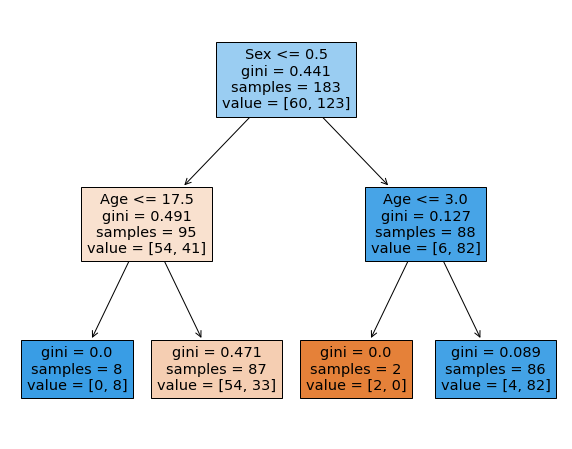

In [63]:
plt.figure(figsize = (10,8))
tree.plot_tree(clf, filled = True, feature_names= X.columns)
plt.show()

C:\ProgramData\Anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


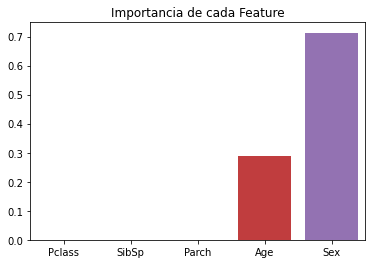

In [66]:
importances = clf.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

## Árboles de Decisión para regresión con Scikit-Learn.

Ahora comenzamos a trabajar en los problemas de **Regresión**, una de las tareas más importantes dentro de Machine Learning (dentro, a su vez, de lo que llamamos Aprendizaje Supervisado). Regresión en Machine Learning consiste en aprender etiquetas numéricas contínuas *y* a partir de un conjunto de atributos/features *X* (que pueden ser uno, dos, o muchos más) tomando como muestra un conjunto de instancias.

En la primera sección, vamos a comenzar introduciendo un dataset sintético unidimensional (un atributo + *y*), siguiendo una relación lineal. Y trataremos de aprender a predecir usando los siguientes modelos: Regresión Lineal, Árboles de Decisión y kNN. Luego, veremos cómo son las curvas obtenidas para cada modelo y cómo son los errores.

En la segunda sección, pasaremos a dos atributos (2D), el límite de lo que podremos visualizar. ¡Pero esto no significa que no podamos trabajar con más atributos!

## 1. Un atributo

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La siguiente celda genera nuestro dataset sintético. Por ahora, serán 500 puntos provenientes de una relación lineal 1-D de la forma $y = 3x - 2$. Asegúrate de identificar correctamente la pendiente y la ordenada al origen. Además, presta atención a que le sumamos *ruido*, para simular una situación un poco más realista.

In [15]:
n = 500
X = np.linspace(-2,3,n)
y_real = 3*X - 2
# y_real = X**2
y = y_real + 1.0*np.random.randn(n)

Y graficamos los puntos obtenidos junto con la curva teórica.

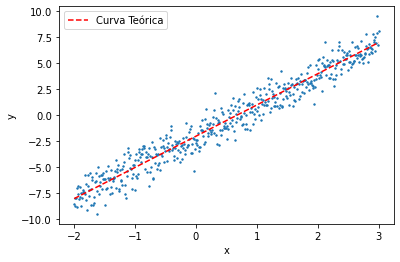

In [16]:
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Vamos a entrenar todos los modelos a la vez. Pero antes, no nos olvidemos del `train_test_split`

In [17]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 1) (350,) (150, 1) (150,)


Definimos los modelos y entrenamos

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)


In [19]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

Veamos qué aprendieron.

La regresión lineal obtiene la pendiente y la ordenada al origen.

In [20]:
print(linear_model.coef_, linear_model.intercept_)

[2.95896053] -2.020027114708275


¿Están cerca de los valores reales? 

Así como los clasificadores obtienen fronteras de decisión que separan los datos, los regresores obtienen curvas que intentan aproximar los datos lo mejor posible. Veamos cómo son estas curvas para cada regresor.

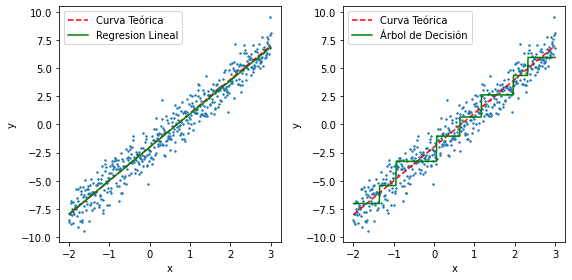

In [21]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Prestar atención a que la regresión lineal hace un muy buen trabajo en reproducir la curva teórica. ¿Qué te parecen los otros modelos?

Veamos qué aprendió el árbol:

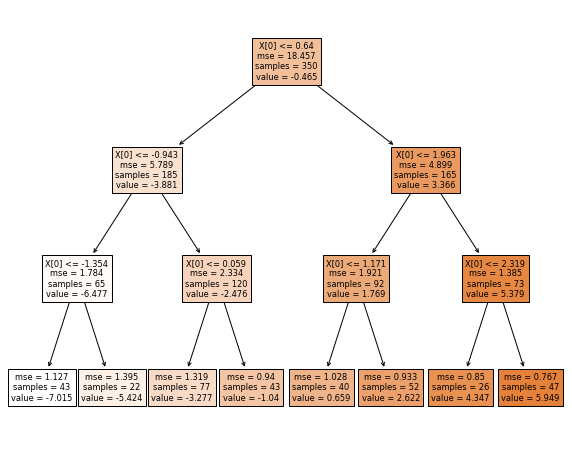

In [22]:
from sklearn import tree
if tree_regressor.max_depth < 4:
    plt.figure(figsize = (10,8))
    tree.plot_tree(tree_regressor, filled = True)
    plt.show()

**Para pensar:** ¿Cómo se relaciona este arbol con la curva obtenida?

Veamos ahora cómo son los errores obtenidos. Vamos a hacer todo en la misma celda, pero tiene tres componentes importantes:
1. El cálculo del RMSE para cada conjunto (train y test).
1. Un gráfico de dispersión de $y$ vs $y_{predicho}$ para el conjunto de test. ¿Si la regresión es buena, cerca de que curva deberían estar los puntos?
1. El histograma de los errores ($y - y_{predicho}$) para cada conjunto.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 0.9703919342305688
Raíz del error cuadrático medio en Test: 1.0192149118921452


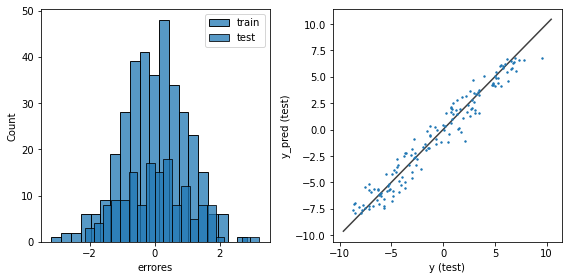

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 1.0266229956113773
Raíz del error cuadrático medio en Test: 1.1456174209377281


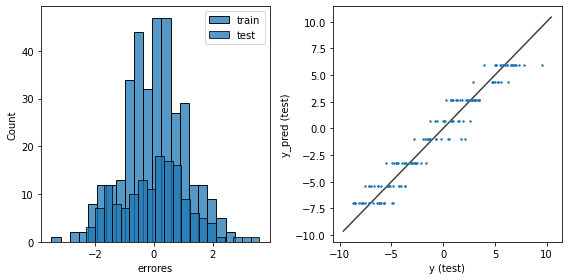

In [23]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión']

for i, model in enumerate([linear_model, tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En todos los casos, ocurre algo parecido:
1. Los errores RMSE representan el error global del regresor. Son similares tanto para test como para train, indicando que no hay un gran sobreajuste.
1. Los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos. Esto es un indicador de que estamos aproximando a nuestros datos de manera correcta.
1. En el gráfico $y$ vs $y_{predicho}$ para el conjunto de test, todos los puntos están cerca de la diagonal (la relación $y = x$), ¡que es lo que esperamos para un buen regresor! Además, el error parece ser similar en todo el rango de posibles valores. **Importante:** asegúrate de que entiendes este gráfico (¿qué ocurre en el caso del árbol?), el hecho de que los puntos deban estar sobre la recta diagonal $y = x$ **no** está relacionado con que estamos aproximando una relación lineal.

**Para probar**: dedicale un buen tiempo a probar distintos valores de `max_depth` y de `n_neighbors`. ¿Qué ocurre cuando `n_neighbors = 1`?¿Puedes diferenciar en el gráfico cuáles instancias se usaron para entrenamiento y cuáles para testeo?¿Y si `n_neighbors` tiende a la cantidad de instancias en el set de entrenamiento qué sucede?

**Para probar**: una vez que te sientas cómodo/a con la aproximación de la función lineal, cambia de relación funcional. Te dejamos una comentada para arrancar. Presta atención a las siguientes preguntas. ¿Cuáles modelos siguen aproximando correctamente?¿Cuáles no?¿Qué ocurre con el análisis de los errores?

## Árboles de Decisión implementación manual. Cálculo de Impureza y Ganancia Gini.

Hoy en día es poco común que tengas que programar un modelo. En general, existen muchas librerías con implementaciones de diferente métodos al alcance de la mano. Sin embargo, hacer una implementación rápida, aunque sea sencilla, ayuda comprender mejor algunos detalles. 

En esta sección vamos a programar la consulta de un árbol de decisión y, luego, calcular algunas impurezas Gini. Todo esto lo implementa Scikit-Learn de forma automática, pero hacerlo te ayudará a comprender mejor los árboles de decisión.

**Ejercicio:** Carga el dataset de Titanic y tomate un rato para estudiar sus características. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

df = pd.read_csv("train.csv")

In [ ]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch
0         0       3    0  22.0      1      0
1         1       1    1  38.0      1      0
2         1       3    1  26.0      0      0
3         1       1    1  35.0      1      0
4         0       3    0  35.0      0      0

### Árbol de decisión *a mano*

Ahora sí, manos a la obra.


**NOTA**: LEER HASTA EL FINAL ANTES DE MODIFICAR EL CÓDIGO.

En primer lugar, vamos a definir algunas funciones que serán de utilidad.

* La función `accuracy`, dada las etiquetas que ustedes predigan y las etiquetas reales, calcula la medida de performance, en este caso, la exactitud. **No la tienes que modificar, pero presta atención a su implementación**.

In [ ]:
def accuracy(y_predicted, y_real):
    mask = np.array(y_predicted) == np.array(y_real)
    return mask.sum()/len(y_real)

* La función `predict_instance`, dada una instancia x con sus atributos, predice si sobrevivió o no. **Es la única función que tendrás que modificar**.

In [ ]:
def predict_instance(x):
    '''
    Modificar las siguientes líneas de codigo. 
    Este será su algoritmo algoritmo para predecir si sobrevivirá o no por instancia.
    La variable prediction debe contener la etiqueta 0 o 1 
    
    Algunas opciones son: predecir que nadie sobrevivio, que todos sobrevivieron,
    predecir al azar, y usar lo aprendido cuando exploramos el dataset de Titanic
    '''
    prediction = 0 # cambiar
    
    ### UNA POSIBLE FORMA DE EMPEZAR:
#     if x.Age < 12:
#         prediction = 1
#     else:
#         prediction = 0
#     # FIN DE COMPLETAR
    
    ### Si usamos el genero y la clase
    if x.Sex == 'female':
        prediction = 1
    elif x.Pclass == 1:
        prediction = 1
    
    return prediction

* Por último, la función `predict` toma todo las instancias `X` y, usando la función que definieron antes, predice para cada una de ellas si sobrevivió o no. **No la tienes que modificar, pero presta atención a su implementación**.

In [ ]:
def predict(X):
    y_predicted = []
    for x in X.itertuples(): 
        y_i = predict_instance(x) 
        y_predicted.append(y_i)
    return y_predicted

**Consigna**

1. Cargar el dataset de Titanic y separar en una variable `X` los atributos que usarás para predecir, y en una variable `y` la etiqueta que quieres predecir. En este caso, si sobrevivió o no.

In [ ]:
X = df.drop("Survived", axis=1)
y = df.Survived

2. Usar los datos `X` para predecir si los pasajeros sobrevivieron o no utilizando la función `predict`. **No tienes que modificar ninguna de las funciones por ahora**.

In [ ]:
y_pred = predict(X)
print(y_pred)

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

3. Calcula la medida de performance entre las etiquetas reales `y` y las etiquetas predichas `y_pred` con la función `accuracy`.

In [ ]:
print("Accuracy final: ", round(accuracy(y_pred, y), 3))

Accuracy final:  0.675


4. Calcula la matriz de confusión con Scikit-Learn.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[360,  64],
       [168, 122]])

**Ejercicio**: modifica `predict_instance` de forma tal de mejorar el resultado recién obtenido. Tal vez te sirva de pista, para arrancar, la famosa frase, "mujeres y niños primero".

**Para pensar:** las performances asociadas a predecir todos `0` (nadie sobrevivió), todos `1` (todos sobrevivieron), y predecir al azar son muy importantes para evaluar nuestro trabajo. ¿Por qué?

### Cálculo de Impureza y Ganancia Gini

Ahora vamos a calcular cuán buena es la *pregunta* del género y clase para separar las muestras usando la impureza Gini. Para ello:

**Ejercicio:** calcula la impureza inicial del dataset. Ayuda: recuerda que en la variable `y` ya separaste las etiquetas. Si es un objeto de Pandas, tal vez la función `value_counts()` puede ser útil. 

In [ ]:
muestras_neg, muestras_pos = y.value_counts()
N = y.size
gini_inicial = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2

In [ ]:
print(gini_inicial)

0.48238903404499056


**Ejercicio:** calcula la impureza Gini luego de separar por el género. Recuerden que tienen que calcular la impureza en dos hojas - una correspondiente a género masculino y otra al femenino - y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear una máscara y reciclar código anterior.

In [ ]:
mascara = df.Sex == 1
y_female = y[mascara]
y_male = y[~mascara]

In [ ]:
muestras_neg, muestras_pos = y_female.value_counts()
N = y_female.size
gini_female = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_female)

0.37016485371618146


In [ ]:
muestras_neg, muestras_pos = y_male.value_counts()
N = y_male.size
gini_male = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_male)

0.32630147800535075


In [ ]:
print('Impureza Gini al separar por Genero:',(y_female.sum()*gini_female + y_male.sum()*gini_male)/y.size)

Impureza Gini al separar por Genero: 0.1446337726002596


**Ejercicio Opcional:** calcula la impureza Gini luego de separar por clase. Recuerden que tienen que calcular la impureza en tres hojas y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear tres máscaras y reciclar código anterior.

In [ ]:
mascara = df.Pclass == 1
y_1 = y[mascara]

In [ ]:
muestras_neg, muestras_pos = y_1.value_counts()
N = y_1.size
gini_1 = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_1)

0.45138166261995605


In [ ]:
mascara = df.Pclass == 2
y_2 = y[mascara]

In [ ]:
muestras_neg, muestras_pos = y_2.value_counts()
N = y_2.size
gini_2 = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_2)

0.49918139597046346


In [ ]:
mascara = df.Pclass == 3
y_3 = y[mascara]

In [ ]:
muestras_neg, muestras_pos = y_3.value_counts()
N = y_3.size
gini_3 = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_3)

0.36421344971235864


In [ ]:
print('Impureza Gini al separar por clase:', (y_1.sum()*gini_1 + y_2.sum()*gini_2 + y_3.sum()*gini_3)/y.size)

Impureza Gini al separar por clase: 0.1785136721718958


**¿Cuál tiene una mayor ganancia Gini?¿Concuerda con lo visto hasta ahora?**

**Para pensar:** ¿cómo modificarías el código para calcular la ganancia Gini al separar por edad? Por ejemplo, al separar por mayor de 12 años y menor de 12 años.
